# Support Vector Machine

It is an advanced way of clustering or classifying higher dimensional data. When there are multiple features to predict from, SVM, which is a supervised learning technique, can be used.

SVM finds higher dimensional support vectors across which to divide, and those of support vectors are mathematically defined as hyperplanes. 



In [1]:
import numpy as np

# create random income/age disto for N people in k clusters
def createClusteredData(N, k):
    pointsPerCluster = float(N)/k
    X = []
    y = []
    for i in range(k):
        incomeCentroid = np.random.uniform(20000, 200000)
        ageCentroid = np.random.uniform(20, 70)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000), np.random.normal(ageCentroid, 2)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

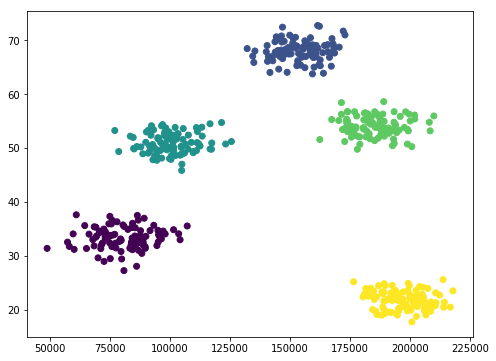

In [2]:
%matplotlib inline
#from pylab import *
import matplotlib.pyplot as plt

(X, y) = createClusteredData(500,5)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

### Indentify plot max/mins

In [3]:
ymax = round(1.1 * max(X[:,1]))
ymin = round(0.6 * min(X[:,1]))

xmax = round(1.2 * max(X[:,0]), 0)
xmin = round(0.5 * min(X[:,0]), 0)

lxy = [xmin, xmax, ymin, ymax]
lxy

[24479.0, 261435.0, 11.0, 80.0]

In [4]:
def plotPredictions(clf, xy):
    xx, yy = np.meshgrid(np.arange(xy[0],xy[1],10), np.arange(xy[2],xy[3],0.5))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    plt.figure(figsize=(8,6))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
    plt.show()

### Applying Linear SVM

In [5]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix

C = 1.0 # error penalty term, change it while doing some sort of convergence on the right model
svc = svm.SVC(kernel='linear', gamma='scale', C=C)
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
predictions = svc.predict(X)
print('SVM - Linear\n')
print('Model prediction\t:', predictions,'\n')
print('Model accuracy \t:', accuracy_score(y, predictions),'\n')
print('Model confusion matrix\n', confusion_matrix(y, predictions),'\n')

SVM - Linear

Model prediction	: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

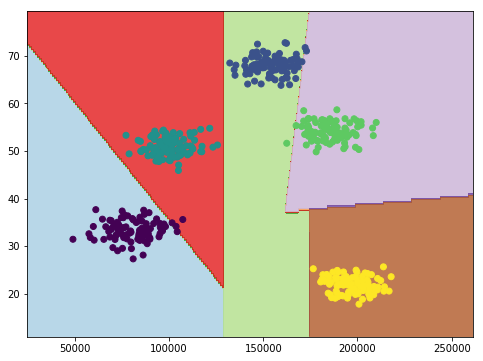

In [7]:
plotPredictions(svc, lxy)

In [8]:
# predict someone with age of 30 has $20000 a year
print(svc.predict([[20000, 30]]))
# predict someone with age of 50 has $100000 a year
print(svc.predict([[100000, 50]]))

[0]
[2]


### Applying polynomial SVM

In [9]:
svc = svm.SVC(kernel='poly', gamma='scale', degree=3, C=C)
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
predictions = svc.predict(X)
print('SVM - Polynomial\n')
print('Model prediction\t:', predictions,'\n')
print('Model accuracy \t:', accuracy_score(y, predictions),'\n')
print('Model confusion matrix\n', confusion_matrix(y, predictions),'\n')

SVM - Polynomial

Model prediction	: [0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 2 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 0 0
 0 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2
 2 2 2 0 3 3 4 3 3 3 3 3 3 4 3 4 4 3 4 4 3 3 3 3 4 3 4 3 3 4 3 1 3 4 3 3 3
 3 3 3 3 4 4 3 3 3 3 3 3 4 3 3 4 4 4 3 1 3 3 3 4 3 3 3 3 4 3 3 3 3 3 3 4 4
 3 3 3 3 3 3 3 4 3 4 4 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 4 3 3 3 4 3 4 4 3 4 4
 4 3 4 3 4 4 4 3 3 3 3 4 3 3 4 3 4 4 4 4 3 4 4 4 4 4 3 4 4 4 4 4 4 4 3 3 4
 4 3 4 3 4 4 4 4 3 3 4 4 3 3 4 4 4 4 3 4 4 4 3 3 4 4 4 4 4 4 4 

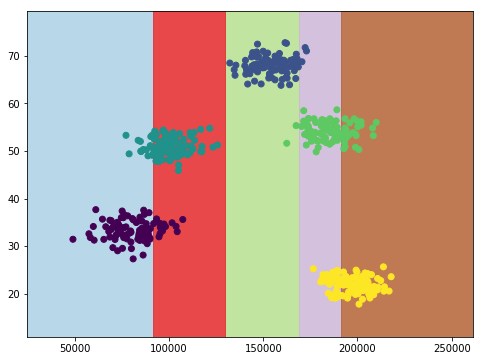

In [11]:
plotPredictions(svc, lxy)

In [12]:
# predict someone with age of 30 has $20000 a year
print(svc.predict([[20000, 30]]))
# predict someone with age of 50 has $100000 a year
print(svc.predict([[100000, 50]]))

[0]
[2]


### Example use of GridSearchCV to find model params
Performing cross validation to find the best hyperparameters(c, gamma), kernels and finding accuracy on training data

In [14]:
import time

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

start = time.time()
clf = svm.SVC()
#param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[10,0.1,0.001] }]
#param_grid = [{'kernel':['poly'], 'gamma':['scale'], 'degree':[3,4] }]
param_grid = [{'kernel':['linear'], 'gamma':['scale','auto'], 'C':[10,1,0.001] }]
gsv = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
gsv.fit(X, y)
end = time.time()
print("Time required ="+str(end-start)+"s")

print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Time required =37.12902235984802s
Best HyperParameter:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy: 98.40%


### Some remarks
To prepare data for SVM:
1. Numerical Conversion:
SVM assumes that you have inputs are numerical instead of categorical. So you can convert them using one of the most commonly used “one hot encoding , label-encoding etc”.
2. Binary Conversion:
Since SVM is able to classify only binary data so you would need to convert the multi-dimensional dataset into binary form using (one vs the rest method / one vs one method) conversion method.